In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import optimize

In [13]:
#optimize.anneal()

In [253]:
def temperature(i, max_iter):
    k = 0.1
    return k * (1 - i / max_iter)

In [254]:
def simulated_annealing(objective, area, iterations, step_size, t):
    # create initial point
    p_curr = area[:, 0] + np.random.rand(len(area)) * (area[:, 1] - area[:, 0])
    p_best = p_curr

    # evaluate initial point
    f_curr = objective(p_curr)
    f_best = f_curr

    values = [[p_curr[0]], [p_curr[1]]]

    for i in range(1, iterations):
        p_delta = (np.random.rand(len(area)) * 2 - np.ones(len(area))) * step_size
        p_new = p_curr + p_delta
        f_new = objective(p_new)

        values[0].append(p_new[0])
        values[1].append(p_new[1])


        if f_new < f_curr: # <, > for min or max
            p_curr, f_curr = p_new, f_new
            if f_new < f_best:
                #print(f"x: {p_new}, y: {f_new}")
                p_best, f_best = p_new, f_new
        elif np.exp(-np.abs(f_new - f_best) / t(i, iterations)) > np.random.rand():
            p_curr, f_curr = p_new, f_new
    
    return p_best, f_best, values

In [255]:
def objective(x):
    return np.linalg.norm(x)

In [259]:
np.random.seed(13) # randomize seed
# define the area of the search space
area = np.asarray([[-6.0, 6.0], [-6.0, 6.0]])
iterations = 5000
step_size = 0.1
# perform the simulated annealing search

p_best, f_best, values = simulated_annealing(objective, area, iterations, step_size, temperature)

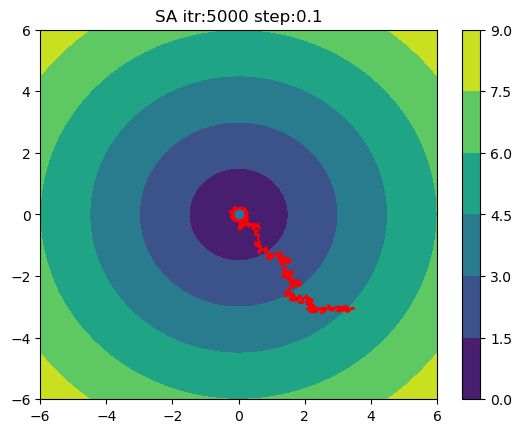

In [261]:
resolution = 100
xlist = np.linspace(area[0, 0], area[0, 1], resolution)
ylist = np.linspace(area[1, 0], area[1, 1], resolution)
X, Y = np.meshgrid(xlist, ylist)

Z = np.zeros((resolution, resolution))
for i, x in enumerate(xlist):
    for j, y in enumerate(ylist):
        Z[i, j] = objective(np.array([x, y]))

fig , ax = plt.subplots(1,1)

cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(values[0], values[1], 'r-')
ax.plot(p_best[0], p_best[1], 'o-')
ax.set_title(f'SA itr:{iterations} step:{step_size}')
#ax.set_xlabel('x (cm)')
#ax.set_ylabel('y (cm)')
plt.show()

In [258]:
p_best, f_best

(array([-0.00138081, -0.00046299]), 0.0014563668345587682)